**Dataset Description: Boston Housing Dataset**

The Boston Housing dataset is a classic and widely-used dataset in regression problems. It contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts.

The task is to predict the median value of owner-occupied homes (medv) based on 13 input features.




 **Feature Description**



*   **crim**	Per capita crime rate by town
* **zn**	Proportion of residential land zoned
for large lots
*  **indus**	Proportion of non-retail business acres per town

*   **chas**	Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*  **nox**	Nitric oxides concentration (parts per 10 million)

*   **rm**	Average number of rooms per dwelling

*  **age**	Proportion of owner-occupied units built before 1940
*     **dis	**Weighted distances to five Boston employment centers

*  **rad**	Index of accessibility to radial highways

*  **tax**	Property-tax rate per $10,000


*  **ptratio**	Pupil-teacher ratio by town


*   **black**	1000(Bk - 0.63)^2 where Bk is the proportion of Black residents

*   **lstat**	% lower status of the population
*  **medv** (target)	Median value of

* **owner**-occupied homes in $1000s

** Objective**

To predict the median house value (medv) using the given 13 features through an Artificial Neural Network (ANN) regression model.

**Imported necessary Libraries**

In [283]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

**Loaded the Dataset:**

Used pandas to load BostonHousing.csv and
Inspected features and target variable

In [284]:
df = pd.read_csv("BostonHousing.csv")

**Data Preprocessing:**

Selected features (X) and target (y)

Split data into training and test sets (80:20)

Standardized features using StandardScaler for ANN input

In [285]:
X = df.drop(columns=['medv'])  # medv is Median Value of owner-occupied homes
y = df['medv']

**Splitted data into Training - Validation - Testing**

In [293]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42)

**Standardizing the dataset**

In [294]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**Model Building (ANN):**

**Input layer:** based on number of features

**Hidden layers:**

Dense(64) with ReLU + Dropout(0.2)

Dense(32) with ReLU + Dropout(0.2)

**Output layer:** Dense(1) for regression

Compiled using Adam optimizer with MSE loss

In [295]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [297]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

**Model Training:**

Trained for 100 epochs
Used 20% of training data for validation and
plotted training and validation loss curves

In [298]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled,y_val), verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 612.6754 - mae: 22.6811 - val_loss: 570.6568 - val_mae: 22.3062
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 591.1501 - mae: 22.3666 - val_loss: 542.2625 - val_mae: 21.6498
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 558.2727 - mae: 21.5567 - val_loss: 508.7648 - val_mae: 20.8770
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 510.6271 - mae: 20.3932 - val_loss: 468.1991 - val_mae: 19.9390
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 459.6991 - mae: 19.3366 - val_loss: 416.2898 - val_mae: 18.7019
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 420.8506 - mae: 18.3719 - val_loss: 352.4313 - val_mae: 17.0638
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 323.0051 - mae: 15.8150 - val_loss: 280.4570 - val_mae: 15.0911
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 266.2464 - mae: 13.9272 - val_loss: 204.6164 - val_mae: 12.6925
Epoch 9/100

**Model Evaluation:**

Calculated Mean Squared Error (MSE) and Mean Absolute Error (MAE) on the test set

Interpreted MAE in terms of dollar error

In [301]:
y_val_pred = model.predict(X_val_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [302]:
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)

In [303]:

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [306]:
print(" Validation Metrics:")
print(f"  - MSE: {val_mse:.2f}")
print(f"  - MAE: ${val_mae:,.2f}")

 Validation Metrics:
  - MSE: 18.16
  - MAE: $3.08


In [307]:
print("\n Test Metrics:")
print(f"  - MSE: {test_mse:.2f}")
print(f"  - MAE: ${test_mae:,.2f}")


 Test Metrics:
  - MSE: 14.49
  - MAE: $2.47


**Visualizations:**



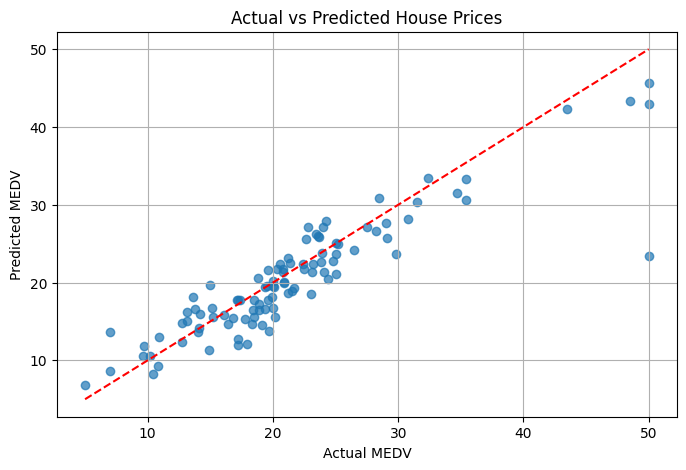

In [310]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


**Conclusion**

The model achieved a test MAE of around $2.47, meaning the predictions are off by about that amount on average. The training and validation loss curves indicate [state: good learning / overfitting]. The actual vs predicted scatter plot shows that most predictions are reasonably accurate, though there may be some variation for higher-priced houses. Overall, the ANN performs decently, but performance could likely be improved with additional feature engineering or by comparing with other models like Random Forest or XGBoost.